# MNIST mit Keras  

## Problemstellung - Handgeschriebene Zahlen erkennen

Die Aufgabe, handgeschriebene Zahlen anhand eines Graustufenbilds zu erkennen, ist ein sehr komplexes Problem für einen Computer. Für ein solches Problem ist Deep Learning aka mit einem neuronalen Netz gut geeignet.

## Notwendige Libraries + Setup GPU

Die Berechnungen dieses Dokuments sind rechenaufwändiger. Daher bietet es sich an eine Funktion von Google Colab zu nutzen. Eine GPU kann über

*   Edit -> Notebook Settings -> Hardware acceleration -> GPU

ausgewählt werden (ist aber auch der Default).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.datasets import mnist
import keras as keras
from tensorflow.keras.optimizers import Adam    # CAUTION: use this Adam (and not 
                                                # keras.optimizers.Adam, doese no longer exist)
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


## MNIST Data Set & Preprocessing

Wir laden die Daten und plotten einige Beispiele. 


11501568/11490434 [==============================] - 0s 0us/step


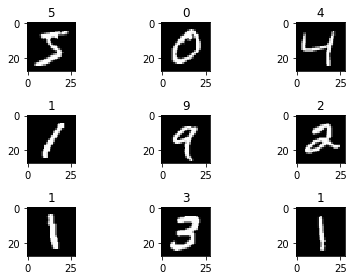

In [ ]:
(XTrain, yTrain), (XTest, yTest) = mnist.load_data()

fig = plt.figure()
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(XTrain[i], cmap='gray', interpolation='none')
    ax.set_title(yTrain[i])
plt.tight_layout() 

## Normalisieren und Formatieren der Daten

Nun reshapen wir jedes Input-Bild in einen langen Vektor mit 784 Elementen und normieren auf [0,1].

Schließlich transformieren wir den Output (jeweils eine Ziffer 0-9) in ein **"one-hot-encoding"**, also einen binären Vektor der Dimension 10 mit einer 1 bei der richtigen Ziffer.

In [ ]:
XTrain = XTrain.reshape(60000, 784)
XTest = XTest.reshape(10000, 784)
XTrainN = XTrain/255
XTestN  = XTest/255

YTrain = np_utils.to_categorical(yTrain, 10)
YTest = np_utils.to_categorical(yTest, 10)

print('XTrainN shape:', XTrain.shape)
print(XTrainN.shape[0], 'train samples')
print(XTestN.shape[0], 'test samples')

XTrainN shape: (60000, 784)
60000 train samples
10000 test samples


## Trainieren des Neuronales Netzes mit Keras

In [ ]:
# Die Lernrate beeinflusst wie stark die Werte bei einem Parameterupdate
# verändert werden. Zu große Lernraten führen zu Oszillationen und
# zu kleine Lernraten sorgen für ein zu langsames Lernen.
learning_rate = 0.01

# Die batch_size ist die Anzahl der Trainingsbeispiele, für die die Deltas akkumuliert
# werden, bevor ein Parameter-Uupdate durchgeführt wird.
batch_size = 256 #128

# Die Anzahl der Epochen bestimmt wie oft die gesamten Daten gelernt werden
# sollen. Bei zu wenig Epochen hat das Netz noch nicht konvergiert. Bei
# zu vielen Epochen wird das Netzwerk stagnieren und im schlimmsten Fall
# die Trainingsdaten auswendig lernen.
epochs = 10

$\color{red}{\mbox{Programmieraufgabe}}$: Bauen Sie ein Neuronales Netz mit Hidden Layern [80,40,20], 
das die MNIST-Aufgabe lernt und die obigen Parameter sowie den ADAM-Optimizer mit Loss Function `'categorical_crossentropy'` verwendet. Lassen Sie die Testdaten als Validierungsdaten beim Training mitlaufen.

Überlegen Sie, welche Aktivierungsfunktionen in den einzelnen Layern Sinn machen.

Stellen Sie fest, wie viele Parameter das Netz in jedem Layer bzw. insgesamt hat.

Nutzen Sie die untenstehenden Evaluierungsmethoden, um verschiedene Parametereinstellungen zu testen: 
*   Probieren Sie mindestens die Lernraten 0.1, 0.01, 0.001 aus. Welche ist am besten geeignet?
*   Testen Sie verschiedene Batch Sizes. Welche ist am besten?
*   Ersetzen Sie `'categorical_crossentropy'` durch `'mean_squared_error'`. Was passiert?

In [ ]:
### Programmieraufgabe: Bauen Sie ein Neuronales Netz mit Hidden Layern [80,40,20], 
### das die MNIST-Aufgabe lernt und die obigen Parameter sowie den ADAM-Optimizer verwendet.
### Probieren Sie mindestens die Lernraten 0.1, 0.01, 0.001 aus. 

myANN = ???
???
history = ???



In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel('Epoche', fontsize=22)
plt.ylabel('Fehler', fontsize=22)
plt.plot(history.history['loss'], label="Training-Fehler")
plt.plot(history.history['val_loss'], label="Test-Fehler")
plt.legend(loc="upper right");

## Güte des Neuronalem Netzes

In [ ]:
accuracy = myANN.evaluate(XTrainN, YTrain, verbose=0)[1]
print("Training accuracy: " + str(accuracy * 100) + "%")

accuracy = myANN.evaluate(XTestN, YTest, verbose=0)[1]
print("Testing accuracy: " + str(accuracy * 100) + "%")

## Klassifizierung eines zufälligen Zeichens

In [ ]:
import random

random_index = random.randint(0, len(XTestN))
random_image = XTestN[random_index]
random_target = YTest[random_index] 
random_prediction = myANN.predict(x=random_image.reshape(-1, 28**2))

target_class = np.argmax(random_target)
predicted_class = np.argmax(random_prediction)

print("Target class: " + str(target_class))
print("Predicted class: " + str(predicted_class))
if target_class == predicted_class:
  print("The network correctly predicted the class!")
else:
  print("The network couldn't predict the class!")

plt.imshow(random_image.reshape(28,28), cmap='gray', interpolation='none');

##Beispiele einiger Fehlklassifikationen
Gezeigt werden die 15 ersten der 251 Fehlklassifikationen auf dem Test Set (10000 Ziffern). 'target' ist die wirkliche Klasse, 'predic' die vom Deep Net vorhergesagte Klasse. 

Manche der Fehler sind gut nachvollziehbar.  

Andere Fehler sind recht unverständlich.

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
y_pred = myANN.predict(x=XTestN)
predic_class = np.argmax(y_pred,axis=1)
target_class = np.argmax(YTest,axis=1)
ind_wrong = np.where(target_class!=predic_class)
w_x_test = XTestN[ind_wrong,:]   # a (1,251,784) tensor 
w_predic_class = predic_class[ind_wrong]
w_target_class = target_class[ind_wrong]
print('target = ',w_target_class[0:3*5])
print('predic = ',w_predic_class[0:3*5])
for i in range(3*5):
    plt.subplot(3, 5, i+1)
    plt.imshow(w_x_test[0,i,:].reshape(28,28), cmap='gray', interpolation='none')


NameError: ignored

# 'Hausaufgabe'

Der folgende Code löst nur unsere 'Hausaufgabe', wie viele Gewichte ein [2,10,20,30,10] Netz hat (1190 Gewichte):

In [ ]:
ANN = Sequential()
ANN.add(Dense(10,input_dim=2,activation='relu'))
ANN.add(Dense(20,activation='relu'))
ANN.add(Dense(30,activation='sigmoid'))
ANN.add(Dense(10,activation='sigmoid'))
ANN.summary()
print((2+1)*10+11*20+21*30+31*10)   